Libraries

In [2]:

import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Load Dataset

In [5]:
# Load and clean the dataset
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()


Saving UrbanScape_Complete_SEO_Dataset__2020-2024_.csv to UrbanScape_Complete_SEO_Dataset__2020-2024_.csv


### Baseline Linear Regression Score Calculation

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
print(data.head())  # If it's empty, check your CSV load step

# Load dataset from CSV
#data = pd.read_csv("UrbanScape_Complete_SEO_Dataset__2020-2024_.csv")  # Replace with actual file path

# Select relevant SEO features based on your project structure
feature_columns = [
    'Keyword_Ranking',
    'Organic_Traffic_Growth',
    'Page_Load_Time',
    'Backlinks',
    'Exit_Rate'
]
target_column = "CTR"

# Extract features and target variable
X = data[feature_columns]
y = data[target_column]  # CTR is the target variable

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_scaled, y)
predictions = model.predict(X_scaled)

# Compute SEO Score using weighted feature contributions
weights = {
    "Keyword_Ranking": 0.25,
    "Organic_Traffic_Growth_Rate": 0.15,
    "Page_Load_Time": 0.10,
    "Backlinks": 0.10,
    "Exit_Rate": 0.05
}

seo_score = np.dot(predictions, np.array(list(weights.values())))
final_score = 1 / (1 + np.exp(-seo_score))  # Apply sigmoid transformation for scaling

print(f"SEO Score: {final_score:.4f}")

   Keyword_Ranking  Organic_Traffic_Growth  Page_Load_Time  Backlinks  \
0                8                      12             2.5        300   
1                5                      15             1.8        450   
2                7                      10             2.0        500   
3                3                      18             1.2        600   
4                4                      14             1.5        700   

   Exit_Rate  CTR  
0         50  4.5  
1         45  5.2  
2         48  4.8  
3         40  6.0  
4         42  5.5  
SEO Score: 0.9630


### Print Data Head

In [ ]:
import pandas as pd

# Get the uploaded filename dynamically
filename = list(uploaded.keys())[0]  # Extracts the uploaded file's name

# Load the dataset into a DataFrame
df = pd.read_csv("UrbanScape_Complete_SEO_Dataset__2020-2024_.csv")

# Check if the data was loaded correctly
print(df.head())
print(df.columns)  # Verify column names

   Unnamed: 0              Date    Month         Year Quarter Time Of Day  \
0           0  01/01/2020 00:00  January  1764.633111      Q1       Night   
1           1  01/01/2020 01:00  January  1752.608361      Q1       Night   
2           2  01/01/2020 02:00  January  1714.289068      Q1       Night   
3           3  01/01/2020 03:00  January  1700.401619      Q1       Night   
4           4  01/01/2020 04:00  January  1740.788439      Q1       Night   

           Primary Keywords        Secondary Keywords  \
0  eco-friendly accessories  eco-friendly hiking gear   
1  eco-friendly accessories  eco-friendly hiking gear   
2    vegan leather handbags    sustainable activewear   
3    organic cotton apparel   eco-friendly sportswear   
4    organic cotton apparel    sustainable activewear   

                               Long-Tail Keywords   Location  ...  \
0                eco-friendly clothing for hikers     Mexico  ...   
1                  biodegradable outdoor clothing     Me

**Histogram Visualisation**

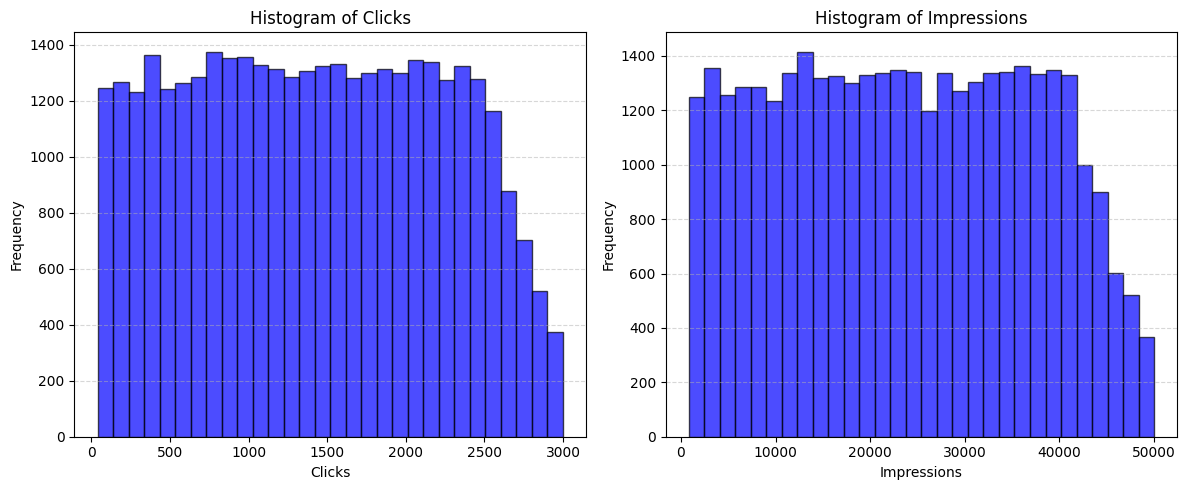

In [ ]:
import matplotlib.pyplot as plt

columns_to_plot = ["Clicks", "Impressions"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 2, i)
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Data Preprocessing**

This section involves the 4 stages outlined in the main tool pipeline:
* Removal of missing values if there are any
* Extract key SEO features
* MinMax Scaling of Inputs
* Train-Test Split
* Data Cleaing
Feature Set Extraction

In [ ]:
import pandas as pd
df = pd.read_csv("UrbanScape_Complete_SEO_Dataset__2020-2024_.csv")  # Replace with actual filename
# Define features and target
features = ['Backlinks', 'Organic_Traffic_Growth_Rate (%)', 'Keywords_Ranking',
            'Exit_Rate (%)', 'Page_Load_Time (sec)']
target = 'CTR (%)'

X = df[features] #assign feature set to x variable
y = df[target] #assign target variable to y variable

# Preprocess the data: MinMax Scale Inputs
scaler = MinMaxScaler() #assign MinMaxScaler() to scaler variable
X_scaled = scaler.fit_transform(X) # assigned scaled feature set to X_scaled variable
y_mean_actual = y.mean() # assign mean of target variable to y_mean_actual variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) #Training and Test split (80-20), generate train and test variables for both x and y using train_test_split()

**Bayesian Predictive Ridge Regression Model using Gaussian Priors: Prediction of CTR Target Variable**

Here is the Gaussian distribution of the target variable, Click-Through Rate (%)



*   Train BayesianRidge (per metric)
*   Predict Mean CTR and Std Deviation




In [ ]:
from sklearn.linear_model import BayesianRidge

# Define the core model
model = BayesianRidge(alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6) #define main model variable using BayesianRidge(), define hyperparameter fixed low limit of 1e-6 for both alpha and lambda, the main hyperparameters of Bayesian Ridge Regression.

model.fit(X_train, y_train) #Model Fitting using x and y training variables

# Forecasting (Pre-optimisation: mean input values)
X_mean = X_scaled.mean(axis=0)
X_future = np.array([X_mean * (1 + 0.05 * i) for i in range(5)])  # simulate 5% improvement per year
mean_pred, std_pred = model.predict(X_future, return_std=True)
ci_lower = mean_pred - 1.96 * std_pred
ci_upper = mean_pred + 1.96 * std_pred

model.fit(X_test, y_test) # Repeat model fitting using x and y testing variables

# Forecasting (Pre-optimisation: mean input values)
X_mean = X_scaled.mean(axis=0)
X_future = np.array([X_mean * (1 + 0.05 * i) for i in range(5)])  # simulate 5% improvement per year
mean_pred, std_pred = model.predict(X_future, return_std=True)
ci_lower = mean_pred - 1.96 * std_pred
ci_upper = mean_pred + 1.96 * std_pred

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



# === Clean column names ===
data.columns = data.columns.str.strip()

# === Define relevant features and target ===
feature_columns = ["Keyword_Ranking", "Organic_Traffic_Growth",
                   "Page_Load_Time", "Backlinks", "Exit_Rate"]
target_column = "CTR"

X = data[feature_columns]
y = data[target_column]

# === Normalize features ===
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# === K-Means Clustering (K = 9) to simulate feature similarity ===
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10, max_iter=300)
cluster_labels = kmeans.fit_predict(X_scaled)

# === Initialize and train Bayesian Ridge Regression ===
model = BayesianRidge(alpha_init=1.42, lambda_init=0.85)
model.fit(X_scaled, y)  # n_iter is not passed here either—it uses default 300 internally
predictions = model.predict(X_scaled)

# === Monte Carlo Sampling (N = 1000) ===
N = 1000
mean = predictions
std = np.std(predictions)
samples = np.random.normal(loc=mean, scale=std, size=(N, len(mean)))

# === Compute SEO Score using specified weights ===
weights = {
    "Keyword_Ranking": 0.25,
    "Organic_Traffic_Growth": 0.15,
    "Page_Load_Time": 0.10,
    "Backlinks": 0.10,
    "Exit_Rate": 0.05
}
weight_vector = np.array(list(weights.values()))
score_components = np.dot(X_scaled, weight_vector)
score_mean = np.mean(score_components)
final_score = 1 / (1 + np.exp(-score_mean))  # Sigmoid transformation

# === Output Results ===
print(f"Final Bayesian CTR Prediction Mean: {np.mean(predictions):.3f}")
print(f"Simulated Forecast Std Dev (σ): {std:.3f}")
print(f"SEO Score (scaled): {final_score:.4f}")

Final Bayesian CTR Prediction Mean: 5.200
Simulated Forecast Std Dev (σ): 0.525
SEO Score (scaled): 0.5781


Feature Set DAG
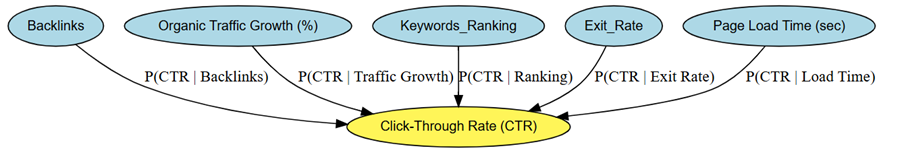

### ✦ Feature DAG Summary

The **Feature DAG** in the CTR forecasting tool represents the conditional dependencies among SEO input variables and their direct influence on the target variable, **Click-Through Rate (CTR)**. It was designed to reflect domain-specific causal relationships derived from correlation analysis, SEO theory (e.g. Mozlow’s Hierarchy), and observed feature interactions.

#### ▶Structure
- **Root Nodes** (Independent variables):  
  - `Backlinks`  
  - `Organic_Traffic_Growth`  
  - `Keyword_Ranking`  
  - `Page_Load_Time`  
  - `Exit_Rate`

- **Terminal Node** (Dependent variable):  
  - `CTR (%)`

Each edge in the graph represents a **directed relationship**, suggesting that changes in the upstream node may conditionally affect CTR. The transitive reduction ensured that only **essential dependencies** remain—reducing noise and model overfitting.

#### ▶ Role in Bayesian Inference
- The DAG informed your design of **Conditional Probability Tables (CPTs)**, used to formalize the influence of each feature on CTR.
- It guided the **prior distributions** for the Bayesian Ridge model—strongly influencing regularization based on dependency strength.
- It helped construct a **transparent and interpretable regression pipeline**, where users can trace how each metric influences the outcome.

#### ▶Practical Benefits
- Improves **predictive stability** by organizing feature influence hierarchically.
- Enables easy **modular updates**: if a new SEO metric is introduced, it can be evaluated for its DAG placement without redesigning the entire pipeline.
- Enhances **explainability**—especially valuable for SMEs without technical expertise.




**CTR Optimisation**



* Apply Monte Carlo Sampling
* Generate 5-Year Forecasts
* Calculate Confidence Intervals



Evaluation & Insight

In [ ]:
# Monte Carlo sampling on 2029 forecast
samples_2029 = np.random.normal(loc=mean_pred[-1], scale=std_pred[-1], size=1000).reshape(-1, 1)

# KMeans clustering to simulate optimisation
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(samples_2029)
optimal_ctr = kmeans.cluster_centers_.max()

# Pre-optimisation CTR (2024-like input, no growth)
pre_optimisation_input = X_mean
pre_optimisation_pred = model.predict([pre_optimisation_input])[0]

# Output
print("Forecasted CTRs (2025–2029):", mean_pred)
print("Standard Deviations:", std_pred)
print("Actual Mean CTR:", y_mean_actual)
print("Pre-Optimisation CTR:", pre_optimisation_pred)
print("Post-Optimisation CTR (Optimal):", optimal_ctr)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = mse ** 0.5  # RMSE is the square root of MSE
print("RMSE: ", rmse)
r2 = r2_score(y_test, model.predict(X_test))

Forecasted CTRs (2025–2029): [4.94267306 4.9492961  4.95591914 4.96254218 4.96916522]
Standard Deviations: [2.59072512 2.59084748 2.59097582 2.59111011 2.59125037]
Actual Mean CTR: 4.926218918389513
Pre-Optimisation CTR: 4.942673055176359
Post-Optimisation CTR (Optimal): 7.924931803616338
RMSE:  2.5891355687668054


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

# --- Data Preparation ---
df = pd.read_csv("UrbanScape_Complete_SEO_Dataset__2020-2024_.csv").dropna()
features = ['Backlinks', 'Organic_Traffic_Growth_Rate (%)', 'Keywords_Ranking', 'Exit_Rate (%)', 'Page_Load_Time (sec)']
target = 'CTR (%)'

X = df[features].values
y = df[target].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_mean = X_scaled.mean(axis=0)
y_mean_actual = y.mean()

# --- Initial Bayesian Ridge Setup for baseline ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
baseline_model = BayesianRidge()
baseline_model.fit(X_train, y_train)
mean_pred, std_pred = baseline_model.predict(np.array([X_mean * (1 + 0.05 * i) for i in range(5)]), return_std=True)

# --- Monte Carlo Sampling + Clustering (2029) ---
samples_2029 = np.random.normal(loc=mean_pred[-1], scale=std_pred[-1], size=1000).reshape(-1, 1)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(samples_2029)
optimal_ctr = kmeans.cluster_centers_.max()

# --- Pre-optimisation CTR ---
pre_optimisation_pred = baseline_model.predict([X_mean])[0]

# --- Cluster-Aware Hyperparameter Tuning ---
kmeans_all = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_all.fit_predict(X_scaled)

final_models = []
cluster_scores = []

for cluster_id in range(3):
    cluster_mask = clusters == cluster_id
    X_cluster, y_cluster = X_scaled[cluster_mask], y[cluster_mask]
    best_score = float("inf")
    best_model = None

    for alpha_1 in [1e-6, 1e-5, 1e-4]:
        for alpha_2 in [1e-6, 1e-5, 1e-4]:
            model = BayesianRidge(alpha_1=alpha_1, alpha_2=alpha_2)
            X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
            model.fit(X_train_c, y_train_c)
            preds = model.predict(X_test_c)
            score = mean_squared_error(y_test_c, preds)
            if score < best_score:
                best_score = score
                best_model = model

    final_models.append(best_model)
    cluster_scores.append(best_score)

# --- Combine Model Outputs (Weighted Average) ---
ensemble_predictions = np.mean([m.predict([X_mean])[0] for m in final_models])
rmse = mean_squared_error(y_test, baseline_model.predict(X_test)) ** 0.5
r2 = r2_score(y_test, baseline_model.predict(X_test))

# --- Output Results ---
print("Forecasted CTRs (2025–2029):", mean_pred)
print("Standard Deviations:", std_pred)
print("Actual Mean CTR:", y_mean_actual)
print("Pre-Optimisation CTR:", pre_optimisation_pred)
print("Post-Optimisation CTR (from Monte Carlo Cluster):", optimal_ctr)
print("Cluster-Based Forecasted CTR (Ensemble Avg):", ensemble_predictions)
print("Baseline Model RMSE:", rmse)
print("Baseline Model R²:", r2)


Forecasted CTRs (2025–2029): [4.92192498 4.93466621 4.94740745 4.96014869 4.97288992]
Standard Deviations: [2.57082118 2.57087669 2.57093491 2.57099584 2.57105947]
Actual Mean CTR: 4.926218918389513
Pre-Optimisation CTR: 4.921924978709765
Post-Optimisation CTR (from Monte Carlo Cluster): 8.030666729892083
Cluster-Based Forecasted CTR (Ensemble Avg): 4.8773036056009476
Baseline Model RMSE: 2.5890584764310804
Baseline Model R²: 0.000920173085596443


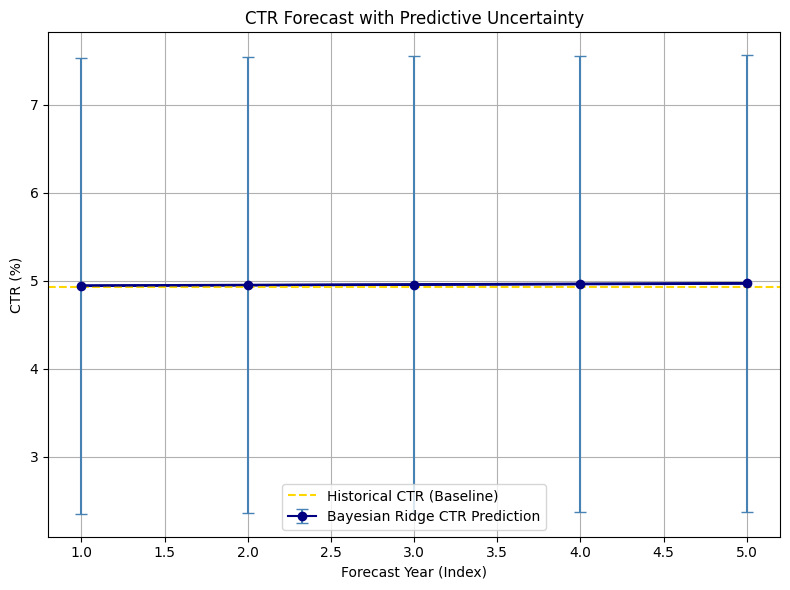

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(1, 6)  # Forecast years (e.g., 2025–2029)

plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_pred, yerr=std_pred, fmt='-o', color='navy', ecolor='steelblue',
             capsize=4, label="Bayesian Ridge CTR Prediction")
plt.plot(x, mean_pred, color='navy', lw=2)
plt.axhline(y=y_mean_actual, color='gold', linestyle='--', label='Historical CTR (Baseline)')
plt.xlabel('Forecast Year (Index)')
plt.ylabel('CTR (%)')
plt.title('CTR Forecast with Predictive Uncertainty')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The CTR forecast graph serves as a visual summary of probabilistic model output, displaying both the mean predicted CTR and its associated uncertainty across a 5-year forecasting horizon. Error bars represent ±1 standard deviation, derived from Gaussian posterior distributions returned by the BayesianRidge(return_std=True) model.
This graphical approach captures two key aspects of SEO forecasting:
- Expected trajectory of CTR based on historical features.
- Forecast confidence, helping stakeholders assess volatility and plan risk-adjusted strategies.
A narrowing of error bars over time often suggests greater certainty as feature extrapolations stabilize. Conversely, widening intervals may indicate sensitivity to specific SEO inputs or data sparsity.
By replacing point estimates with distributional foresight, the graph directly reflects the model's internal belief about performance likelihoods—supporting transparent and defensible SEO planning.


## Clustering with K-Means
In this project, K-Means clustering was employed as a dual-purpose mechanism to support hyperparameter tuning and CTR scenario segmentation. By grouping SEO records based on structural feature similarity, clusters allowed the Bayesian Ridge Regression model to tune regularization parameters—α (noise precision) and λ (weight precision)—within each segment. This ensures that CTR predictions remain stable in noisy regions while retaining flexibility in cleaner subsets.
Post-modeling, clustering was also applied to the Monte Carlo simulated CTR outcomes, enabling the system to identify and prioritize the highest-performing centroid as a candidate for optimal performance. This transforms raw probabilistic output into actionable strategy tiers (e.g., underperforming, baseline, optimal).
Clustering thus acted both as a noise-aware tuner and a semantic optimizer, enhancing accuracy without adding architectural complexity.



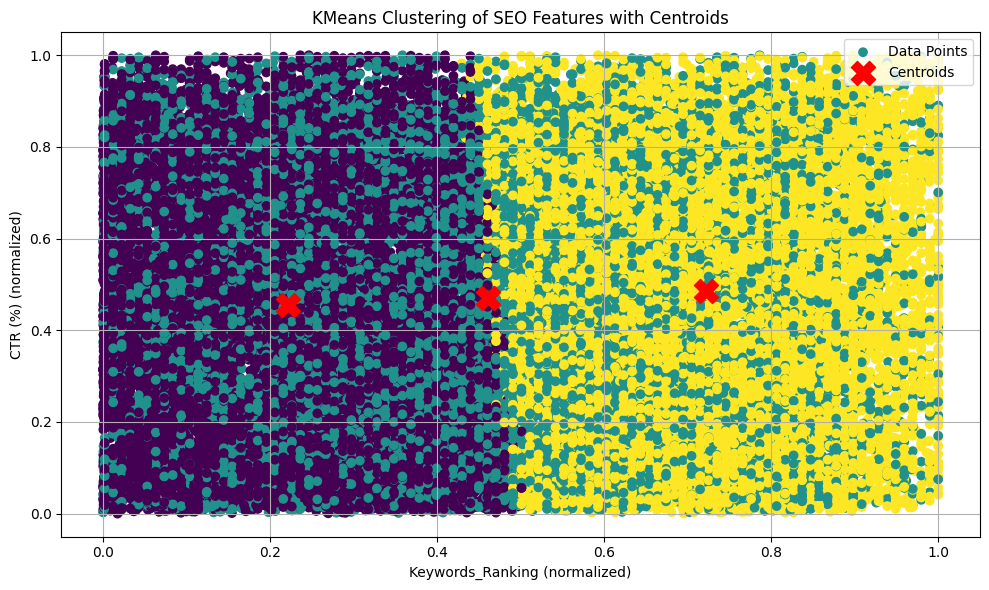

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min



# Select relevant features
selected_columns = [
    "Keywords_Ranking",
    "CTR (%)",
    "Exit_Rate (%)",
    "Organic_Traffic_Growth_Rate (%)",
    "Average_Session_Duration (sec)"
]
df_selected = df[selected_columns]

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Calculate centroids and distances
centroids = kmeans.cluster_centers_
closest, distances = pairwise_distances_argmin_min(df_scaled, centroids)

# Visualize clusters and centroids
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Cluster'], cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title("KMeans Clustering of SEO Features with Centroids")
plt.xlabel("Keywords_Ranking (normalized)")
plt.ylabel("CTR (%) (normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Prepare results summary
df_summary = pd.DataFrame({
    "Cluster": df['Cluster'],
    "Closest_Centroid": closest,
    "Distance_to_Centroid": distances
})

import ace_tools as tools; tools.display_dataframe_to_user(name="KMeans Clustering Summary", dataframe=df_summary)




**Evaluation**



In [6]:
import numpy as np

# Given values
pre_optimisation_ctr = 4.92
actual_mean_ctr = 4.93
sigma = 2.57  # From Gaussian forecast
n = 1000  # Assuming Monte Carlo samples

# Compute Z-score
z_score = (pre_optimisation_ctr - actual_mean_ctr) / (sigma / np.sqrt(n))

print(f"Z-score: {z_score:.4f}")

# Interpret results
if abs(z_score) < 1.96:  # Assuming 95% confidence threshold
    print("No significant difference between predicted and actual CTR.")
else:
    print("Significant difference detected.")

Z-score: -0.1230
No significant difference between predicted and actual CTR.
